# MovieLens Data Processing

In [43]:
# Import packages
import os
import pandas as pd

In [44]:
# Define file directories
MOVIELENS_DIR = '/Users/carriexia/Desktop/fall_2023/softwares_ai_ml/module_5/assignment2/data/dat'
USER_DATA_FILE = 'users.dat'
MOVIE_DATA_FILE = 'movies.dat'
RATING_DATA_FILE = 'ratings.dat'

In [45]:
# Specify User's Age and Occupation Column
AGES = { 1: "Under 18", 18: "18-24", 25: "25-34", 35: "35-44", 45: "45-49", 50: "50-55", 56: "56+" }
OCCUPATIONS = { 0: "other or not specified", 1: "academic/educator", 2: "artist", 3: "clerical/admin",
                4: "college/grad student", 5: "customer service", 6: "doctor/health care",
                7: "executive/managerial", 8: "farmer", 9: "homemaker", 10: "K-12 student", 11: "lawyer",
                12: "programmer", 13: "retired", 14: "sales/marketing", 15: "scientist", 16: "self-employed",
                17: "technician/engineer", 18: "tradesman/craftsman", 19: "unemployed", 20: "writer" }

In [46]:
# Define csv files to be saved into
USERS_CSV_FILE = 'users.csv'
MOVIES_CSV_FILE = 'movies.csv'
RATINGS_CSV_FILE = 'ratings.csv'

In [47]:
# Read the Ratings File
ratings = pd.read_csv(os.path.join(MOVIELENS_DIR, RATING_DATA_FILE), 
                    sep='::', 
                    engine='python', 
                    encoding='latin-1',
                    names=['user_id', 'movie_id', 'rating', 'timestamp'])

# Set max_userid to the maximum user_id in the ratings
max_userid = ratings['user_id'].drop_duplicates().max()
# Set max_movieid to the maximum movie_id in the ratings
max_movieid = ratings['movie_id'].drop_duplicates().max()

# Process ratings dataframe for Keras Deep Learning model
# Add user_emb_id column whose values == user_id - 1
ratings['user_emb_id'] = ratings['user_id'] - 1
# Add movie_emb_id column whose values == movie_id - 1
ratings['movie_emb_id'] = ratings['movie_id'] - 1

print(len(ratings), 'ratings loaded')

1000209 ratings loaded


In [49]:
ratings

,user_id,movie_id,rating,timestamp,user_emb_id,movie_emb_id
0,1,1193,5,978300760,0,1192
1,1,661,3,978302109,0,660
2,1,914,3,978301968,0,913
3,1,3408,4,978300275,0,3407
4,1,2355,5,978824291,0,2354
...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,6039,1090
1000205,6040,1094,5,956704887,6039,1093
1000206,6040,562,5,956704746,6039,561
1000207,6040,1096,4,956715648,6039,1095


In [50]:
# Save into ratings.csv
ratings.to_csv(RATINGS_CSV_FILE, 
               sep='\t', 
               header=True, 
               encoding='latin-1', 
               columns=['user_id', 'movie_id', 'rating', 'timestamp', 'user_emb_id', 'movie_emb_id'])
print('Saved to', RATINGS_CSV_FILE)

Saved to ratings.csv


In [51]:
# Read the Users File
users = pd.read_csv(os.path.join(MOVIELENS_DIR, USER_DATA_FILE), 
                    sep='::', 
                    engine='python', 
                    encoding='latin-1',
                    names=['user_id', 'gender', 'age', 'occupation', 'zipcode'])
users['age_desc'] = users['age'].apply(lambda x: AGES[x])
users['occ_desc'] = users['occupation'].apply(lambda x: OCCUPATIONS[x])
print(len(users), 'descriptions of', max_userid, 'users loaded.')

6040 descriptions of 6040 users loaded.


In [52]:
# Save into users.csv
users.to_csv(USERS_CSV_FILE, 
             sep='\t', 
             header=True, 
             encoding='latin-1',
             columns=['user_id', 'gender', 'age', 'occupation', 'zipcode', 'age_desc', 'occ_desc'])
print('Saved to', USERS_CSV_FILE)

Saved to users.csv


In [53]:
# Read the Movies File
movies = pd.read_csv(os.path.join(MOVIELENS_DIR, MOVIE_DATA_FILE), 
                    sep='::', 
                    engine='python', 
                    encoding='latin-1',
                    names=['movie_id', 'title', 'genres'])
print(len(movies), 'descriptions of', max_movieid, 'movies loaded.')

3883 descriptions of 3952 movies loaded.


In [54]:
# Save into movies.csv
movies.to_csv(MOVIES_CSV_FILE, 
              sep='\t', 
              header=True, 
              columns=['movie_id', 'title', 'genres'])
print('Saved to', MOVIES_CSV_FILE)

Saved to movies.csv


In [33]:
ratings_count = ratings['movie_id'].value_counts()
top_100_movies_by_users = ratings_count.nlargest(100).index


filtered_ratings = ratings[ratings['movie_id'].isin(top_100_movies_by_users)]
average_ratings = filtered_ratings.groupby('movie_id')['rating'].mean()

sorted_ratings = average_ratings.sort_values(ascending=False)

top_100_top_rated_movies = pd.merge(sorted_ratings.head(100), movies, left_index=True, right_on='movie_id')
top_100_top_rated_movies 


,rating,movie_id,title,genres
315,4.554558,318,"Shawshank Redemption, The (1994)",Drama
847,4.524966,858,"Godfather, The (1972)",Action|Crime|Drama
49,4.517106,50,"Usual Suspects, The (1995)",Crime|Thriller
523,4.510417,527,Schindler's List (1993),Drama|War
1180,4.477725,1198,Raiders of the Lost Ark (1981),Action|Adventure
...,...,...,...,...
642,3.432875,648,Mission: Impossible (1996),Action|Adventure|Mystery
2559,3.409778,2628,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Fantasy|Sci-Fi
1533,3.401126,1573,Face/Off (1997),Action|Sci-Fi|Thriller
2614,3.388424,2683,Austin Powers: The Spy Who Shagged Me (1999),Comedy


In [38]:
top_20_movies = top_100_top_rated_movies.head(20)
top_20 = top_20_movies['title'].tolist()


print("Top 20 Movies popular movies:")
for movie in top_20:
    print(movie)

Top 20 Movies popular movies:
Shawshank Redemption, The (1994)
Godfather, The (1972)
Usual Suspects, The (1995)
Schindler's List (1993)
Raiders of the Lost Ark (1981)
Star Wars: Episode IV - A New Hope (1977)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)
Casablanca (1942)
Sixth Sense, The (1999)
One Flew Over the Cuckoo's Nest (1975)
Godfather: Part II, The (1974)
Silence of the Lambs, The (1991)
Saving Private Ryan (1998)
Monty Python and the Holy Grail (1974)
American Beauty (1999)
Matrix, The (1999)
Princess Bride, The (1987)
Star Wars: Episode V - The Empire Strikes Back (1980)
Pulp Fiction (1994)
GoodFellas (1990)


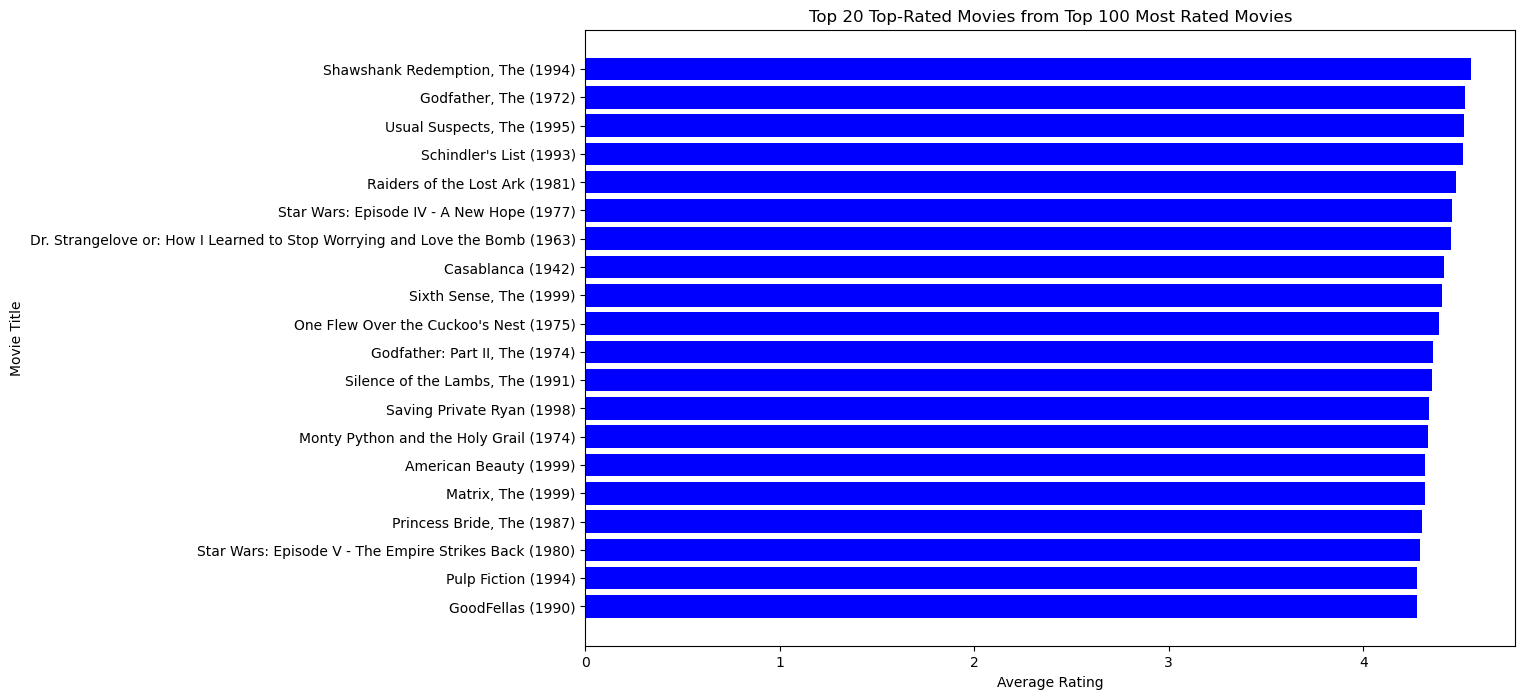

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(top_20_movies['title'], top_20_movies['rating'], color='blue')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Top 20 Top-Rated Movies from Top 100 Most Rated Movies')
plt.gca().invert_yaxis()  # To have the highest rated movie at the top
plt.show()
